In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
class Bicycle:
    def __init__(self):
        self.max_steering_rate = 1.22 # rad/s
        self.wheelbase = 2 # m
        self.l_r = 1.2 # m
        self.sampling_time = 0
        

        self.pos_x = 0
        self.pos_y = 0
        self.steering_angle = 0.1974
        self.heading_angle = 0
        self.slip_angle = 0

    def step(self, velocity, steering_rate):
        steering_rate = steering_rate if steering_rate < self.max_steering_rate else self.max_steering_rate
        velocity_x = velocity * np.cos(self.heading_angle + self.slip_angle)
        velocity_y = velocity * np.sin(self.heading_angle + self.slip_angle)
        angular_speed = velocity * np.cos(self.slip_angle) * np.tan(self.steering_angle)/self.wheelbase
        self.slip_angle = np.arctan(self.l_r*np.tan(self.steering_angle)/self.wheelbase)

        self.pos_x += velocity_x * self.sampling_time
        self.pos_y += velocity_y * self.sampling_time
        self.steering_angle += steering_rate * self.sampling_time
        self.heading_angle += angular_speed * self.sampling_time

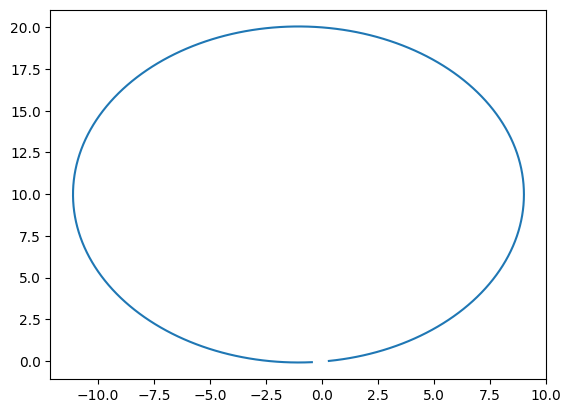

In [118]:
model = Bicycle()
sampling_time = 0.01
model.sampling_time = sampling_time
end_time = 2 # s
radius = 10  # m


t_data = np.arange(0,end_time,sampling_time)

pos_x_data = np.zeros_like(t_data)
pos_y_data = np.zeros_like(t_data)
velocity = 2*np.pi*radius/end_time

for i in range(t_data.shape[0]):
    model.step(velocity, 0)
    pos_x_data[i] = model.pos_x
    pos_y_data[i] = model.pos_y

plt.plot(pos_x_data, pos_y_data)
plt.show()

## Figure of 8

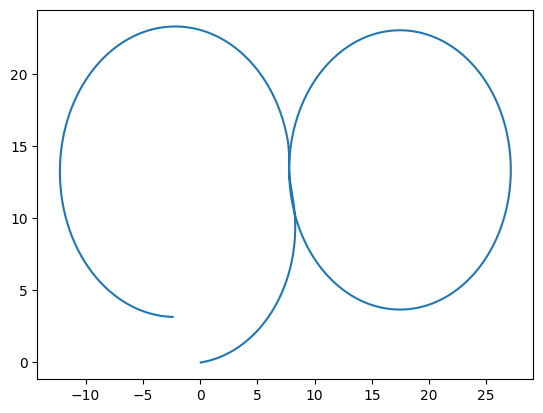

In [133]:
model = Bicycle()
sampling_time = 0.01
model.sampling_time = sampling_time
end_time = 20 # s
radius = 10  # m


t_data = np.arange(0,end_time,sampling_time)

pos_x_data = np.zeros_like(t_data)
pos_y_data = np.zeros_like(t_data)
velocity = 2*2*np.pi*radius/end_time
model.steering_angle = np.arctan(model.wheelbase/radius)

for i in range(t_data.shape[0]):
    if i < t_data.shape[0]/8:
        if model.steering_angle <= np.arctan(model.wheelbase/radius):
            model.step(velocity, model.max_steering_rate)
        else:
            model.step(velocity, 0)

    elif t_data.shape[0]/8 < i <= 5*t_data.shape[0]/8:
        if model.steering_angle > -np.arctan(model.wheelbase/radius):
            model.step(velocity, -model.max_steering_rate)
        else:
            model.step(velocity, 0)
    else:
        if model.steering_angle < np.arctan(model.wheelbase/radius):
            model.step(velocity, model.max_steering_rate)
        else:
            model.step(velocity, 0)
    
    pos_x_data[i] = model.pos_x
    pos_y_data[i] = model.pos_y

plt.plot(pos_x_data, pos_y_data)
plt.show()